In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimgd
from skimage import exposure
import cv2
import cv2.aruco as aruco

In [3]:
#image = cv2.imread('work_space/work_space_photo20181119_030253.jpg')
image = cv2.imread(r"C:/Users/barte/Documents/Studia VII/new_stano.png")
print(image.shape)
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.bilateralFilter(gray, 15, 15, 15)
cv2.imshow('bilateral', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

(410, 626, 3)


In [4]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_ARUCO_ORIGINAL)#aruco.DICT_6X6_250)
parameters = aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
preview = aruco.drawDetectedMarkers(image, corners)
cv2.imshow('preview', preview)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
corners

[array([[[149., 326.],
         [152., 366.],
         [111., 369.],
         [108., 330.]]], dtype=float32), array([[[563., 299.],
         [599., 296.],
         [600., 333.],
         [566., 336.]]], dtype=float32), array([[[137.,  99.],
         [ 96., 100.],
         [ 94.,  59.],
         [135.,  58.]]], dtype=float32), array([[[554.,  85.],
         [553.,  48.],
         [588.,  46.],
         [590.,  84.]]], dtype=float32)]

In [6]:
genPts = (v[0][0] for v in corners)
pts = np.stack(genPts)
rect = np.zeros((4, 2), dtype="float32")

In [7]:
s = pts.sum(axis=1)
rect[0] = pts[np.argmin(s)]
rect[2] = pts[np.argmax(s)]

diff = np.diff(pts, axis=1)
rect[1] = pts[np.argmin(diff)]
rect[3] = pts[np.argmax(diff)]

(tl, tr, br, bl) = rect

In [8]:
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))

heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))

maxWidth = max(int(widthA), int(widthB))
maxHeight = max(int(heightA), int(heightB))

dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]], dtype="float32")

M = cv2.getPerspectiveTransform(rect, dst)
warp = cv2.warpPerspective(orig, M, (maxWidth, maxHeight))
cv2.imshow('wrap image', warp)
cv2.waitKey(0)

warp = cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)
warp = exposure.rescale_intensity(warp, out_range=(0, 255))

cv2.imshow("image", image)
cv2.imshow("warp", warp)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[149.0, 326.0], [563.0, 299.0], [137.0, 99.0], [554.0, 85.0]]


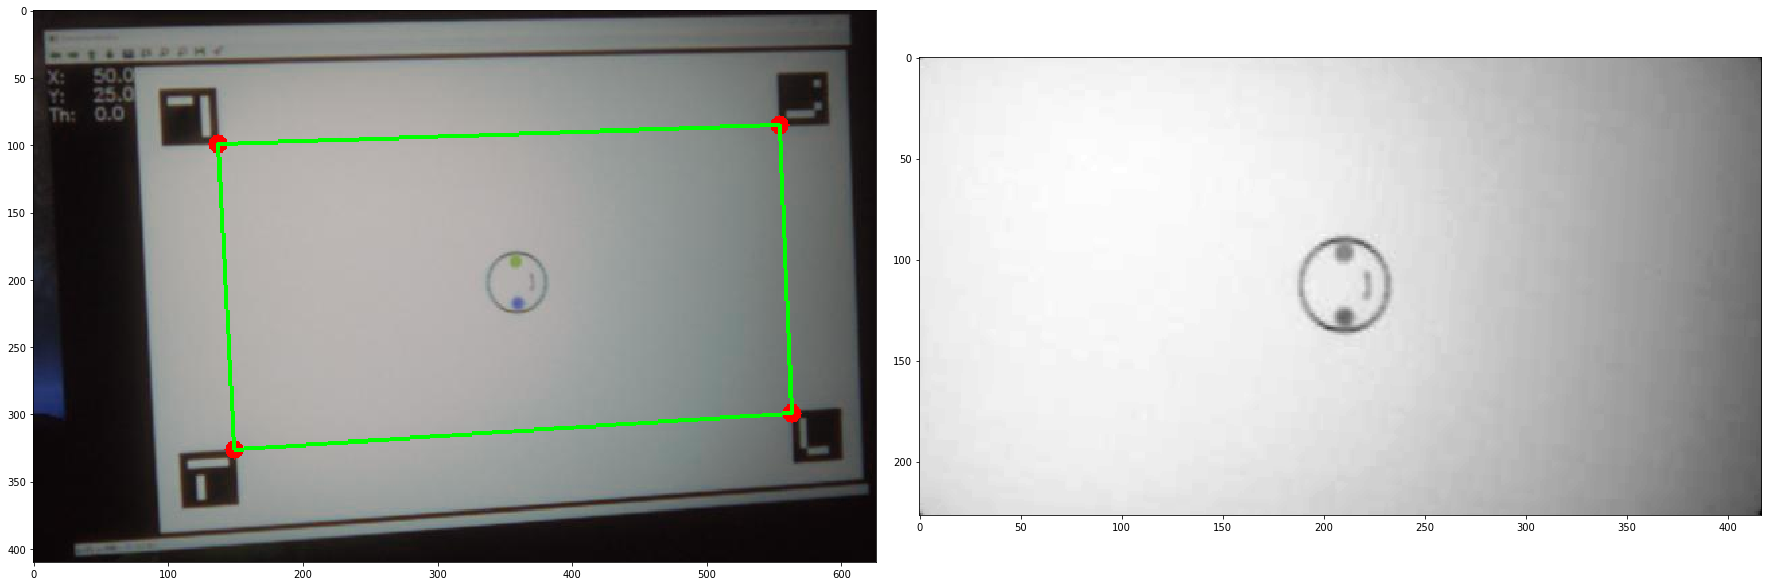

In [37]:
image_path = './work_space/work_space_photo20181119_030253.jpg'
image1 = cv2.imread(image_path)

for i in np.stack(pts):
    x,y = i.ravel()
    cv2.circle(image1,(x,y),7,(255,0,0),-1)
cv2.polylines(image1, [pts.astype(np.int32)], True, (0,255,0), 2)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image1)
#ax1.set_title('Before warping', fontsize=50)
ax2.imshow(warp, cmap='gray')
#ax2.set_title('After', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [ ]:
#image_path = './work_space/work_space_photo20181119_030253.jpg'
image_path = r"C:/Users/barte/Documents/Studia VII/new_stano.png"
image1 = cv2.imread(image_path)

for i in np.stack(pts):
    x,y = i.ravel()
    cv2.circle(image1,(x,y),7,(255,0,0),-1)
array = pts.tolist()
print(array)
arr = np.array([array[2],array[0], array[1],array[3]], dtype="int32"),
cv2.polylines(image1, arr, True, (0,255,0), 2)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image1)
#ax1.set_title('Before warping', fontsize=50)
ax2.imshow(warp, cmap='gray')
#ax2.set_title('After', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [35]:
np.array([array[2],array[0], array[3],array[1]], dtype="int32"),

(array([[137,  99],
        [149, 326],
        [554,  85],
        [563, 299]]),)

In [29]:
pts.astype(np.int32)

(array([[137,  99],
        [554,  85],
        [149, 326],
        [563, 299]]), array([[149, 326],
        [563, 299],
        [137,  99],
        [554,  85]]))

In [118]:
corners

[array([[[554., 364.],
         [600., 365.],
         [604., 412.],
         [557., 411.]]], dtype=float32), array([[[ 70., 355.],
         [ 64., 399.],
         [ 21., 397.],
         [ 27., 352.]]], dtype=float32), array([[[105., 100.],
         [ 68., 100.],
         [ 76.,  72.],
         [111.,  71.]]], dtype=float32), array([[[531.,  95.],
         [528.,  61.],
         [569.,  60.],
         [573.,  94.]]], dtype=float32)]